# Health Information Systems and Decision Support Systems
## WPO 3: Data-driven systems  (11/03/22)
***
*Jakub Ceranka, Pieter Boonen, Jef Vandemeulebroucke* <br>
*Department of Electronics and Informatics (ETRO)* <br>
*Vrije Universiteit Brussel, Pleinlaan 2, B-1050 Brussels, Belgium*

<font color=blue>Abhisheik Krishnagiri Tupil Ravikanth - 0575002</font>
<font color=blue> Tripat Kaur - 0572962</font>


***
### Goal
The goal of this practical session is to get an insight into architecture and basic functionalities of an automatic bone cancer detection system using real life medical image dataset of metastatic bone disease patients. Your tasks will involve examining and preprocessing the data, training various classifiers and validating the performance of your system against the ground-truth predictions done manually by an experienced radiologist. Students must send their notebook using the Assignment functionality of Canvas before the __16th of March, 2022, 23:59. Remember to include the HTML format!.__ The grade from this practical session will contribute to your final grade.
Questions: [jceranka@etrovub.be](mailto:jceranka@etrovub.be), [jwuts@etrovub.be](mailto:jwuts@etrovub.be) 
***
### Metastatic bone disease MRI dataset
***
#### Bone metastases
Cancer that begins in an organ, such as lungs, breast or prostate, and then spreads via blood stream or lymph vessels to the bone is called a __metastatic bone disease__ (MBD). Bone metastases mostly affect axial skeleton, pelvis and upper parts of the femur bones. Patients with advanced breast or prostate cancer have more than 50% chance to develop bone metastases. MBD results in severe bone pain, fractures, spinal cord compression and eventually death.
***
#### Assessment of treatment response
In order to assess the treatment response of a MBD patient over time, the volume and several functional properties of all present bone metastases have to be compared before and after the treatment. This is done using various whole-body medical imaging modalities such as computed tomography, bone scintigraphy or magnetic resonance imaging. A decrease in tumour volume over time usually indicates good response to the treatment. However, the assessment of the response to treatment of bone lesions has been considered difficult and time consuming, compared to lesions involving soft tissues or other organs. Commercial software that enable radiologists to interactively or semi-automatically define individual volumes of interest (VOIs) is beginning to emerge. However, in patients with metastatic bone disease, the number of metastases can be large, making it impractical and extremely time consuming to use such software to evaluate all lesions. This motivates us to work on fully automated segmentation algorithms for the extraction of bone metastases, which could greatly facilitate the disease management for such patients. Additionally, it could also provide valuable tools for studies on large patient populations.
***
#### Whole-body MRI
Whole-body magnetic resonance imaging (MRI) offers excellent sensitivity for the detection of neoplastic cells within the bone marrow using so-called anatomic sequences. Basic sequences, i.e. T1-weighted sequences, provide a high contrast between the low signal intensity of the lesions and the high signal intensity of the surrounding marrow. This contrast enables lesion measurement and has been shown feasible in prostate and breast cancer metastases.
Additionally, due to the development of parallel imaging and ultra-fast MRI sequences (i.e. echo-planar imaging), functional sequences can be additionally acquired. The whole-body diffusion-weighted imaging (WB-DWI) showed a great potential in tumour detection [<cite>[1]</cite>](https://www.ncbi.nlm.nih.gov/pubmed/24510426)[<cite>[2]</cite>](http://journals.plos.org/plosone/article?id=10.1371/journal.pone.0091779).  Moreover, the technique provides quantitative functional parameters showing early changes after therapy: apparent diffusion coefficient (ADC)[<cite>[3]</cite>](https://radiopaedia.org/articles/apparent-diffusion-coefficient-1) and allows for computations of artificial images: high b-value computed DWI [<cite>[4]</cite>](https://www.ncbi.nlm.nih.gov/pubmed/21852566)
***
#### Anatomical and functional images
![modalities](modalities.png)
The above image represents all whole-body MRI image modalities used to characterize bone metastases (marked with red arrows). From the left:
- T1 anatomical image (bone metastases are darker than the healthy bone)
- B-0 diffusion weighted image (lesions are usually brighter than normal bone)
- B-1000 diffusion weighted image (lesions are usually much brighter than normal bone)
- ADC map (lesions usually lie within a range of 600 to 1200 voxel intensity value)
- B-1500 and B-2000 computed diffusion weighted image (lesions are usually much brighter than normal bone, less false positive high intensity signal (e.g. kidneys, bladder)

The following image shows a manual delineation of lesions done by radiologist using T1 anatomy image (superior resolution). Segmentation was mapped on complementary image modalities (B-0, B-1000 and ADC respectively).

![lesions_zoom](lesions_zoom.png)
***
#### Features:
The goal of the classification task (binary classification) is to determine if a certain voxel of patient's skeleton corresponds to bone lesion or healthy bone tissue, which will allow to automatically construct a segmentation image highlighting bone metastases. In order to do so, you are provided with a dataset consisting of a list of all voxels of the skeleton tissue from 9 metastatic bone disease patients. 

Each skeleton voxel has an independent set of features describing its individual properties:
- The medical diagnosis label assessed by a radiologist via manual segmentation: *healthy* or *lesion*.
- The (x, y ,z) 3D position coordinates. 
- A set of 5 unique features representing its intensity values across each of 6 different modalities used (T1, B-0, B-1000, ADC, B-1500, B-2000):
        a) Intensity of a voxel 
        b) Mean intensity of a kernel of size 5 around the voxel of interest
        c) Median intensity of a kernel of size 5 around the voxel of interest
        d) Maximum intensity of a kernel of size 5 around the voxel of interest
        e) Minimum  intensity of a kernel of size 5 around the voxel of interest
        
All features were computed automatically, using automatic image processing algorithms. In total the dataset consists of 291776 voxels labeled *healthy* or *lesion*. The dataset is balanced and has a 50-50 distribution: 145888 *healthy* voxels, 145888 *lesion* voxels.

You can read more about the way the features were extracted in [<cite>[5]</cite>](https://www.spiedigitallibrary.org/conference-proceedings-of-spie/9414/1/Spinal-focal-lesion-detection-in-multiple-myeloma-using-multimodal-image/10.1117/12.2081990.short?SSO=1), where authors have used a similar feature extraction method. 


***
### Task 1: Prepare the data for Machine Learning Algorithms  

Before doing any manipulations to the data, lets inspect it first. Open metastases features of the first patient and have a look at the data using the head() and info() commands. In order to create an effective training dataset, several preprocessing steps have to be performed. The following steps have to be performed for each patient's data individually. 
__Hint__: it is useful to use a for loop, performing all of the following steps for each patient (1-9). 
<br><br>
1. __Removing useless columns.__ Have a look at the *head()* of the dataframe. Some columns are not needed at your classifier training stage since they do not hold any relevant information. Remove the column with the ordinal number and all three positional columns (X,Y,Z). Your dataset should be 4 columns narrower in shape now.
<br><br>
2. __Handling missing data.__ Most machine learning algorithms cannot work with missing features, so let's take care of that. Use panda's function *info()* to check if any feature has missing 'not-a-number' values. You can solve that problem easily by either dropping those lines with a *dropna()* function or setting them to zero, mean or median of the feature column (function *fillna()*). Because the more the data, usually, the better the performance of the classifier, lets substitute the missing values with the median of the column in which the values are missing.
<br><br>
3. __Separation of data.__ Separate the training set from the labels (classes). Save the training set as X and label column as Y.
<br><br>
4. __Concatenation of features.__ Inside the for loop, concatenate all dataframes. __Hint__: In order to append all patient's data, create two empty dataframes (intensity train dataset and label column) and copy column names from the first patient's dataframe. Append empty dataframes with new data with every iteration of the loop. The function should return a formated intensity dataframe and Y dataframe containing the label column. 
<br><br>


In [1]:
### Code for Task 1
import pandas as pd
import os

patient_1 = pd.read_csv("./Data/Patient_1/Features_Balanced.csv")

In [2]:
patient_1.head()

,Unnamed: 0,T1,Mean_T1,Median_T1,Max_T1,Min_T1,B0,Mean_B0,Median_B0,Max_B0,...,Min_B2000,ADC,Mean_ADC,Median_ADC,Max_ADC,Min_ADC,Position_X,Position_Y,Position_Z,class
0,0,653.0,864.664,863.0,1150.0,517.0,63.0,81.872,61.0,454.0,...,4.0,787.0,905.912,873.0,1773.0,197.0,15,888,264,healthy
1,1,622.0,759.960,778.0,1024.0,442.0,59.0,97.400,95.0,227.0,...,5.0,758.0,907.400,758.0,1755.0,427.0,15,892,222,healthy
2,2,1047.0,781.800,778.0,1047.0,493.0,67.0,102.248,88.0,462.0,...,5.0,862.0,890.144,868.0,1807.0,45.0,16,296,264,healthy
3,3,728.0,612.944,607.0,819.0,395.0,1853.0,1140.992,1326.0,2056.0,...,0.0,1957.0,2130.600,1946.0,4004.0,558.0,17,287,248,healthy
4,4,953.0,780.696,800.0,1023.0,483.0,99.0,193.384,91.0,1271.0,...,1.0,326.0,889.504,822.0,2377.0,167.0,17,303,249,healthy


In [3]:
patient_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1368 entries, 0 to 1367
Data columns (total 35 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1368 non-null   int64  
 1   T1            1368 non-null   float64
 2   Mean_T1       1368 non-null   float64
 3   Median_T1     1368 non-null   float64
 4   Max_T1        1368 non-null   float64
 5   Min_T1        1368 non-null   float64
 6   B0            1368 non-null   float64
 7   Mean_B0       1368 non-null   float64
 8   Median_B0     1368 non-null   float64
 9   Max_B0        1368 non-null   float64
 10  Min_B0        1368 non-null   float64
 11  B1000         1368 non-null   float64
 12  Mean_B1000    1368 non-null   float64
 13  Median_B1000  1368 non-null   float64
 14  Max_B1000     1368 non-null   float64
 15  Min_B1000     1368 non-null   float64
 16  B1500         1368 non-null   float64
 17  Mean_B1500    1368 non-null   float64
 18  Median_B1500  1368 non-null 

In [6]:
def prepareData(path):
    X = pd.DataFrame()
    y = pd.DataFrame()
    for file in os.listdir(path):
        if file != ".DS_Store" and file != "Patient_Test":
            patientFile = path+"/"+file+"/Features_Balanced.csv"
            if patientFile.endswith(".csv"):
                data = pd.read_csv(patientFile)
                data = data.drop(['Unnamed: 0','Position_X','Position_Y','Position_Z'], axis=1)
                data = data.fillna(data.median())
                #  why are we doing this?
                intensityTrain = data.drop('class', axis=1)
                label = pd.DataFrame(data['class'])
                X = X.append(intensityTrain,ignore_index=True)
                y = y.append(label,ignore_index=True)
    return X.iloc[:,:-1],y

In [7]:
intensityTrainData,label = prepareData("./Data")

In [8]:
intensityTrainData.head()

,T1,Mean_T1,Median_T1,Max_T1,Min_T1,B0,Mean_B0,Median_B0,Max_B0,Min_B0,...,B2000,Mean_B2000,Median_B2000,Max_B2000,Min_B2000,ADC,Mean_ADC,Median_ADC,Max_ADC,Min_ADC
0,570.0,677.984,585.0,1060.0,378.0,130.0,125.072,123.0,155.0,95.0,...,6.0,7.088,7.0,12.0,3.0,1304.0,1297.144,1308.0,1524.0,1039.0
1,703.0,720.152,703.0,1069.0,378.0,122.0,120.904,121.0,149.0,89.0,...,7.0,7.744,8.0,12.0,4.0,1262.0,1257.408,1275.0,1488.0,1014.0
2,682.0,590.064,566.0,832.0,438.0,114.0,114.448,117.0,149.0,85.0,...,9.0,9.288,8.0,17.0,5.0,1331.0,1295.880,1308.0,1517.0,1021.0
3,578.0,654.784,582.0,1044.0,378.0,129.0,122.696,122.0,152.0,89.0,...,7.0,8.144,7.0,16.0,4.0,1300.0,1273.608,1291.0,1485.0,1003.0
4,632.0,700.736,679.0,1076.0,426.0,112.0,114.280,117.0,162.0,81.0,...,9.0,10.552,9.0,20.0,6.0,1242.0,1219.232,1237.0,1480.0,880.0


In [9]:
label.head()

,class
0,healthy
1,healthy
2,healthy
3,healthy
4,healthy


***
### Task 2: Data visualization 

Make a scatter plot and a seaborn's kde plot showing relation of the classes (healthy/lesion) for the T1 intensity vs B-1000 intensity.

Which plot is better for the visualization of that many datapoints (scatter or kde)?

YOUR ANSWER HERE

In [10]:
### Code for Task 2
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

label1 = label.replace({'healthy':0,'lesion':1}) 
concatDataset = pd.concat([intensityTrainData,label1], axis = 1, sort = False)
concatDataset.head()

,T1,Mean_T1,Median_T1,Max_T1,Min_T1,B0,Mean_B0,Median_B0,Max_B0,Min_B0,...,Mean_B2000,Median_B2000,Max_B2000,Min_B2000,ADC,Mean_ADC,Median_ADC,Max_ADC,Min_ADC,class
0,570.0,677.984,585.0,1060.0,378.0,130.0,125.072,123.0,155.0,95.0,...,7.088,7.0,12.0,3.0,1304.0,1297.144,1308.0,1524.0,1039.0,0
1,703.0,720.152,703.0,1069.0,378.0,122.0,120.904,121.0,149.0,89.0,...,7.744,8.0,12.0,4.0,1262.0,1257.408,1275.0,1488.0,1014.0,0
2,682.0,590.064,566.0,832.0,438.0,114.0,114.448,117.0,149.0,85.0,...,9.288,8.0,17.0,5.0,1331.0,1295.880,1308.0,1517.0,1021.0,0
3,578.0,654.784,582.0,1044.0,378.0,129.0,122.696,122.0,152.0,89.0,...,8.144,7.0,16.0,4.0,1300.0,1273.608,1291.0,1485.0,1003.0,0
4,632.0,700.736,679.0,1076.0,426.0,112.0,114.280,117.0,162.0,81.0,...,10.552,9.0,20.0,6.0,1242.0,1219.232,1237.0,1480.0,880.0,0


In [11]:
healthy = concatDataset.loc[concatDataset['class'] == 0]
lesion = concatDataset.loc[concatDataset['class'] == 1]

<Figure size 432x288 with 0 Axes>

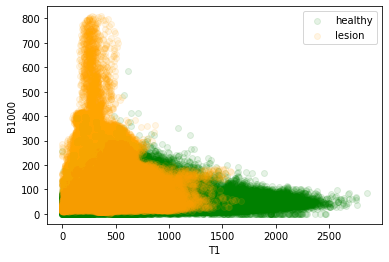

<Figure size 432x288 with 0 Axes>

In [12]:
# Scatter plot
plt.scatter(healthy['T1'], healthy['B1000'],color='green',label='healthy',
            alpha = 0.1)
plt.scatter(lesion['T1'], lesion['B1000'],color='orange',label='lesion',
            alpha= 0.1)
plt.legend(loc='upper right')
plt.xlabel('T1')
plt.ylabel('B1000')
plt.figure()

<Figure size 432x288 with 0 Axes>

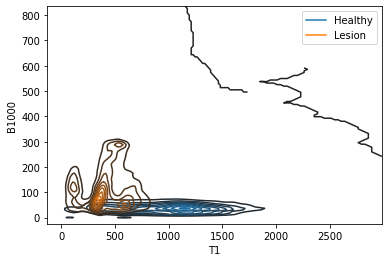

<Figure size 432x288 with 0 Axes>

In [13]:
# KDE-Plot
sns.kdeplot(healthy['T1'], healthy['B1000'],label = "Healthy")
sns.kdeplot(lesion['T1'], lesion['B1000'], label = "Lesion")
plt.legend(loc='upper right')
plt.figure()

***
### Task 3: Training classifiers

After the data is preprocessed and formated for machine learning purposes, lets train our first classifier. In order to have a reliable and unbiased result of the classifier accuracy, the classifier cannot be trained on the same data, which later is used for validation. Therefore, you have to split your dataset into training and testing data. A quick option is to use Scikit-Learn's __cross-validation__ feature. It performs a K-fold cross-validation: it randomly splits the training set into *K* distinct subsets called folds, then trains and evaluates your classifier model *K* times, picking a different fold for evaluation every time and training on the other *K-1* folds. The result will contain *K* evaluation scores. Additionally, shuffle your data during cross-validation to make sure that you use an equal part of each patient data. __Hint__: [__ShuffleSplit__](http://scikit-learn.org/stable/modules/cross_validation.html#computing-cross-validated-metrics)

Declare two classifier models: random forest and K-neighbors classifier and using the function *cross_val_score* calculate the mean of 10-fold cross validation on your feature dataset. Print the obtained scores per classifier, their mean and standard deviation.

What is the accuracy score? Which classifier performed best? 

YOUR ANSWER HERE

In [14]:
### Code for Task 3 
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
import warnings
warnings.filterwarnings('ignore')

In [15]:
shuffle = ShuffleSplit(n_splits=10)

In [35]:
model1 = RandomForestClassifier(n_estimators=5)
cv1_results = cross_val_score(model1, intensityTrainData, label, cv=shuffle)

In [17]:
model2 = KNeighborsClassifier(n_neighbors=5)
cv2_results = cross_val_score(model2,intensityTrainData, label.values.ravel(), cv=shuffle)

In [36]:
print("Ranfom Forest Classifier")
print("10-Fold Cross Validation Results are: " + str(cv1_results))
print("Mean: " + str(cv1_results.mean()))
print("STD: " + str(cv1_results.std()))

Ranfom Forest Classifier
10-Fold Cross Validation Results are: [0.97943656 0.97847693 0.97940229 0.97693468 0.97943656 0.97775721
 0.97840839 0.97967647 0.97909384 0.9792652 ]
Mean: 0.9787888134896153
STD: 0.0008406803122524686


In [19]:
print("K Nearest Neighbor Classifier")
print("10-Fold Cross Validation Results are: " + str(cv2_results))
print("Mean: " + str(cv2_results.mean()))
print("STD: " + str(cv2_results.std()))

K Nearest Neighbor Classifier
10-Fold Cross Validation Results are: [0.96949757 0.96864076 0.97049147 0.97073137 0.96860648 0.96884639
 0.97018301 0.9693262  0.96994311 0.97004593]
Mean: 0.9696312290081568
STD: 0.0007267768663617211


***
### Task 4: Validation of predicted values 

Based on the results from Task 3, chose the best classifier. Using sklearn __train_test_split__, split the data into 2 sets: the _training_ set and the _test_ set. It is common to use 80% of the data for training and 20% for testing. Train the classifier on the _training_ set and use it to predict the _test_ set. Measure & visualise the perfomance of your classifier using the confusion matrix, the classification report and the ROC curve.
__Hint__: Transform the Healthy/Lesion parameters into binary in order to create the ROC curve

In [20]:
### Code for Task 4
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,auc

X_train, X_test, y_train, y_test = train_test_split(intensityTrainData, label1, test_size=0.8, random_state=42)

In [21]:
model1.fit(X_train,y_train)

RandomForestClassifier(n_estimators=20)

In [22]:
predictions = model1.predict(X_test)

In [23]:
print(confusion_matrix(predictions,y_test))

[[112878   2386]
 [  3735 114422]]


In [24]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97    115264
           1       0.98      0.97      0.97    118157

    accuracy                           0.97    233421
   macro avg       0.97      0.97      0.97    233421
weighted avg       0.97      0.97      0.97    233421



In [25]:
fpr, tpr, _ = roc_curve(y_test, predictions)
roc_auc= auc(fpr, tpr)

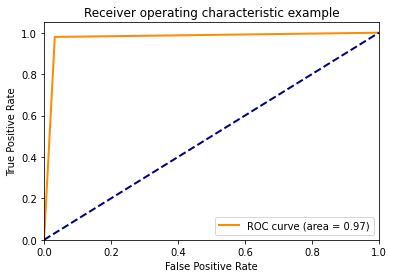

In [26]:
plt.figure()
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

***
### Task 5: Optimization of the classifier (Optional)

Optimize your classifier using sklearn __grid search__. Grid optimizes your classifier based on the parameters you want it to experiment with and what values to try out. It uses cross-validation to evaluate all possible combinations of the parameters and values, providing the optimal combinations in the end. For the sake of time, choose 3 parameters you want to optimize. More info on the parameters can be found [__here__](https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74). Retrain your optimized classifier and compare performance with the non-optimized classifier. 

In [37]:
###Code for task 5
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 5, stop = 40, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 30, num = 5)]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth}

rf_random = RandomizedSearchCV(estimator = model1, param_distributions = random_grid, cv = 10,random_state=42)
# Fit the random search model
rf_random.fit(intensityTrainData, label)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(n_estimators=5),
                   param_distributions={'max_depth': [10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'n_estimators': [5, 13, 22, 31, 40]},
                   random_state=42)

In [38]:
best_random = rf_random.best_estimator_
best_random

RandomForestClassifier(max_depth=15, max_features='sqrt', n_estimators=40)

In [39]:
optimized_result = cross_val_score(best_random, intensityTrainData, label, cv=shuffle)

In [40]:
print("Optimized Ranfom Forest Classifier")
print("10-Fold Cross Validation Results are: " + str(optimized_result))
print("Mean: " + str(optimized_result.mean()))
print("STD: " + str(optimized_result.std()))

Optimized Ranfom Forest Classifier
10-Fold Cross Validation Results are: [0.9792652  0.98005346 0.98118445 0.97977929 0.98084173 0.98180136
 0.97995065 0.98053328 0.98152718 0.98115018]
Mean: 0.9806086777709233
STD: 0.0007864451029824402


***
### Task 6: Segmentation result image

It is time to test our machine learning algorithm on a new data, which was not involved in a training stage. You are going to detect bone lesions in a test patient to test the performance of your classifier. After tissue classification, we will create a segmentation image.

1. Train the best performing classifier with suitable parameters on the whole dataset of 9 patients (do not use cross validation).

2. Have a look at the *Patient_Test* folder. The folder contains information extracted from 3 different frontal slices of the same bone metastases patient. For each slice the following files are given:
    - .csv file containing a list of features extracted from every skeleton voxel visible on the slice
    - .mhd image file representing T1-anatomy MRI image (slice_T1.mhd)
    - .mhd image file representing a ground-truth segmentation image (slice_GT.mhd)
    
3. Load and plot the T1 image using provided SimpleITK functions. For more information on SimpleITK click [here](http://insightsoftwareconsortium.github.io/SimpleITK-Notebooks/)

4. Choose a slice and load a corresponding .csv file. Remove not needed columns and split the dataframe into features, positions and class columns of size 30, 2 and 1 accordingly.

5. Using your trained intensity classifier, predict if the voxels from the slice are of a healthy or metastatic bone. Compare your findings with a ground truth vector extracted in point 4. Print classification report.

6. Reconstruct segmentation using provided function using obtained predicted classes vector and position data. Plot your result in the overlay with T1 image.

7. Repeat for the remaining two slices.

In [ ]:
### Code for task 6
import SimpleITK as sitk
import matplotlib.pyplot as plt
%matplotlib inline

def loadImage(filename):
    image = sitk.ReadImage(filename)
    return image

def showImage(image):
    plt.figure(figsize=(5, 20))
    plt.imshow(sitk.GetArrayViewFromImage(image), cmap=plt.cm.Greys_r)

def showImageOverlay(image1, image2):
    plt.figure(figsize=(5, 20))
    plt.imshow(sitk.GetArrayViewFromImage(image1), cmap='gray', interpolation='none')
    plt.imshow(sitk.GetArrayViewFromImage(image2), cmap='Reds', alpha=0.3, interpolation='none')
    
def reconstruct_segmentation_image(predicted, positions, slice_filename):
    
    # Load slice image and convert to numpy array
    slice_image = sitk.ReadImage(slice_filename)
    slice_image = sitk.GetArrayFromImage(slice_image)
    
    # Convert position columns to int type
    position = positions.to_numpy()
    position = position.astype(int)
    
    # Create empty slice template
    output_seg = np.zeros((slice_image.shape[0], slice_image.shape[1]))
    
    # Fill in the template using predictions
    for i in range(len(predicted)):
        if predicted[i] == 'healthy':
            output_seg[position[i,0],position[i,1]] = 0
        else:
            output_seg[position[i,0],position[i,1]] = 1
    
    output_seg = sitk.GetImageFromArray(output_seg)
    
    return output_seg